In [1]:
"""nbconvert header

We are just configuring to hide some unnecessary warnings.
"""

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Curve Fitting in PyARPES

## Why curve fit

Curve fitting is an extremely important technique in angle resolved-photoemission because it provides a coherent way of dealing with noisy data, it allows for simple treatment of backgrounds, it avoids painful questions of interpretation inherent with some techniques, and it grants access to the rich information ARPES provides of the single particle spectral function.

## Simple curve fitting

PyARPES uses `lmfit` in order to provide a user friendly, compositional API for curve fitting. This allows users to define more complicated models using operators like `+` and `*`, but also makes the process of curve fitting transparent and simple.

Here we will prepare an EDC with a step edge, and fit it with a linear density of states multipled by the Fermi distribution and convolved with Gaussian instrumental broadening (`AffineBroadenedFD`). In general in PyARPES, we use extensions of the models available in `lmfit`, which provides an xarray compatible and unitful fitting function `guess_fit`. This has more or less the same call signature as `fit except that we do not need to pass the X and Y data separately, the X data is provided by the dataset coordinates.

Activating auto-logging. Current session state plus future input saved.
Filename       : logs/curve-fitting_2024-08-18_02-38-26.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
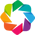

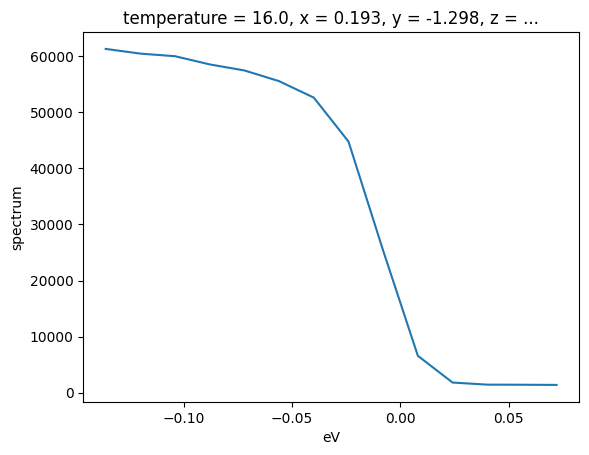

In [2]:
import arpes.config
# first let's prepare some data to curve fit
from arpes.io import example_data

test_edc = (
    example_data.temperature_dependence.spectrum.sel(eV=slice(-0.15, None))
    .sum("phi")
    .isel(temperature=0)
)

test_edc.plot()

Now, let's fit this data with a broadened edge.

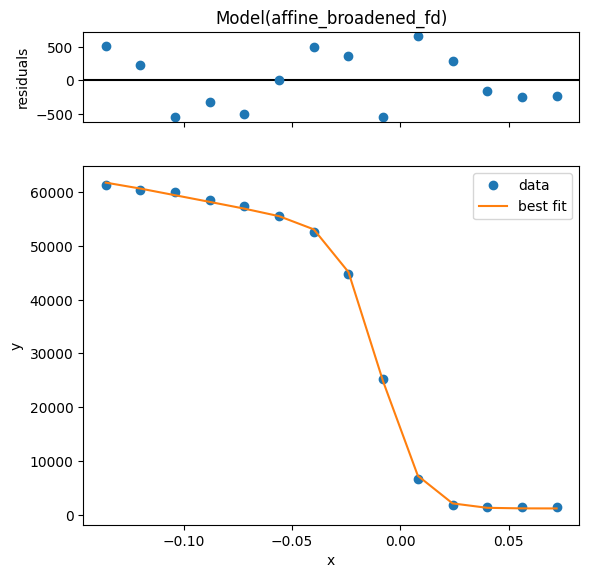

In [3]:
from arpes.fits.fit_models import AffineBroadenedFD

result = AffineBroadenedFD().guess_fit(test_edc)
result.plot()  # plot the fit, residual, etc
result  # print parameters and info

Empirically, we have a very good fit. One thing it is good to know about resolution convolved edges is that there are two width parameters: `width` and `conv_width`. These are the intrinsic edge width caused by thermally excited carriers in the Fermi-Dirac distribution and a broadening which affects the entire spectrum due to instrumental effects, respectively.

Because these can have nearly degenerate effects if you have only a single edge with no peak, you may want to set one parameter or another to an appropriate value based on known experimental conditions.

From your analyzer settings and photon linewidth, you may know your resolution broadening, while from the temperature you may know the intrinsic edge width.

Before moving on, the tabular representations of parameters above was produced by letting the cell output be `result`.

## Influencing the fit by setting parametrs

Using the `params=` keyword you can provide initial guess with `value`, enforce a `max` or `min`, and request that a parameter be allowed to `vary` or not. In this case, we will force a fit with the step edge at 10 millivolts, obtaining a substantially worse result.

Let's fit again but request that the step edge must be found at positive five millivolts.

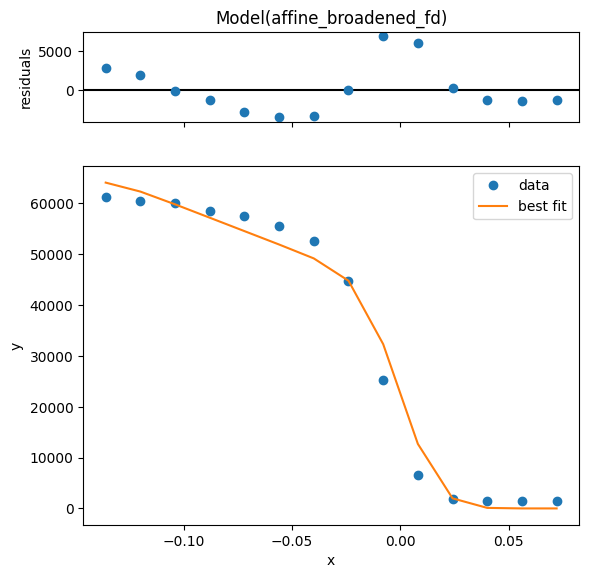

In [4]:
guess_fit_result = AffineBroadenedFD().guess_fit(
    test_edc,
    params={
        "center": {
            "value": 0.005,  # set the initial guess to 5meV
            "vary": False,  # do not vary this parameter
        }
    },
).plot()

## Overview of some models

A number of models already exist including lineshapes, backgrounds, and step edges. All of these can also be easily composed to handle several lineshapes, or convolution with instrumental resolution:

* `arpes.fits.fit_models.GaussianModel`

* `arpes.fits.fit_models.VoigtModel`

* `arpes.fits.fit_models.LorentzianModel`

* `arpes.fits.fit_models.AffineBackgroundModel`

* `arpes.fits.fit_models.GStepBModel` - for a Gaussian convolved low temperature step edge

* `arpes.fits.fit_models.ExponentialDecayModel`

* `arpes.fits.fit_models.ConstantModel`

* `arpes.fits.fit_models.LinearModel`

* `arpes.fits.fit_models.FermiDiracModel`

* `arpes.analysis.gap.AffineBroadenedFD` - for a linear density of states with Gaussian convolved Fermi edge

Adding additional models is very easy, especially if they are already part of the large library of models in `lmfit`. If you are interested, have a look at the definitions in `arpes.fits.fit_models`.

Also, remember that you can combine models using standard math operators.

## Broadcasting fits

While curve fitting a single EDC or MDC is useful, often we will want to repeat an analysis across some experimental parameter or variable, such as the binding energy to track a dispersion, or across temperature to understand a phase transition.

PyARPES provides a tool, `broadcast_model` that allows for automatic and compositional curve fitting across one or more axes of a Dataset or DataArray. You can use the `params=` keyword to enforce constraints or specify initial guesses for the fitting parameters. Broadcasts can be performed over a single dimension (`str`) or a list of dimensions (pass `[str]`). Here we demonstrate performing the fitting procedure as a function of the sample temperature, and then plot the step edge location onto the data.



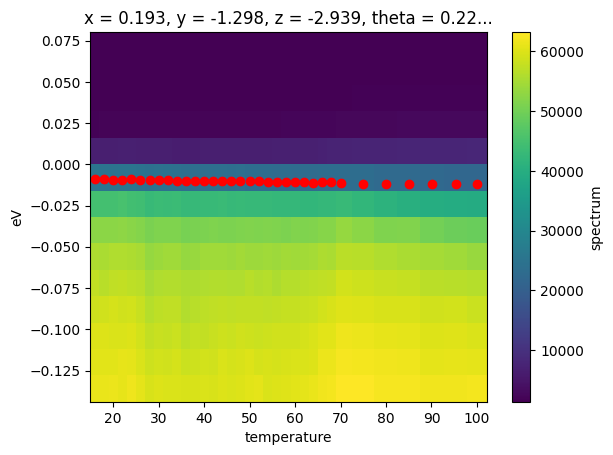

In [5]:
import matplotlib.pyplot as plt
from arpes.fits.utilities import broadcast_model

temp_edcs = example_data.temperature_dependence.sel(eV=slice(-0.15, None)).sum("phi").spectrum

fit_results = broadcast_model(
    AffineBroadenedFD,  # <- fit this model class
    temp_edcs,  # <- on this dataset
    "temperature",  # <- by iterating across slices of this variable
    #    or variables
    params={"conv_width": {"value": 0, "vary": False}},
    progress=False,
)

temp_edcs.T.plot()
plt.scatter(*fit_results.results.F.p("center").G.to_arrays(), color="red")

In the above, we also used the `.F` extension to `xarray` in order to get the concrete values of the `center` fit parameter as an array. This is necessary because the result of a broadcast fit is a `Dataset` containing the full data, the residual, and the results. The results attribute is itself a DataArray whose values are the full results of the fit, rather than any single of the values.

Because of the rich information provided by a broadcast, PyARPES also has facilities for interacting with the results of an array of fit results more simply, furnished by the `.F` attribute.

### The .F attribute

You can get all the parameter names with `.parameter_names`.

#### Getting fit values

Using the `.F` attribute we can obtain the values for (`p`) as well as the fit error of (`s`) any fit parameters we like.

(16.0, 99.98)

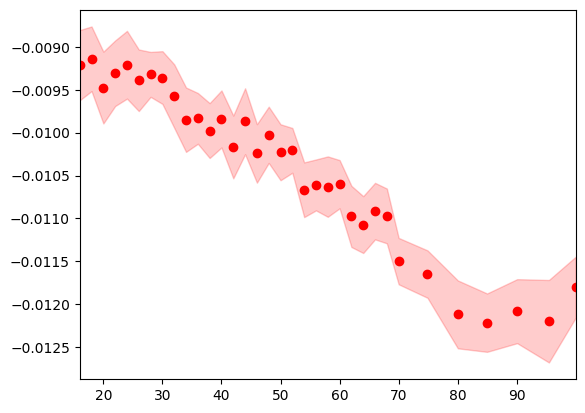

In [6]:
p, s = fit_results.results.F.p("center"), fit_results.results.F.s("center")

fig, ax = plt.subplots()
ax.fill_between(fit_results.temperature.values, p - s, p + s, color="red", alpha=0.2)
ax.scatter(fit_results.temperature.values, p, color="red")

ax.set_xlim(fit_results.temperature.values[[0, -1]])

## Quickly plotting a fit

We can also quickly plot a fit result with `plot_param`. This is sometimes useful for immediately plotting a fit result onto data or another plot sequence.

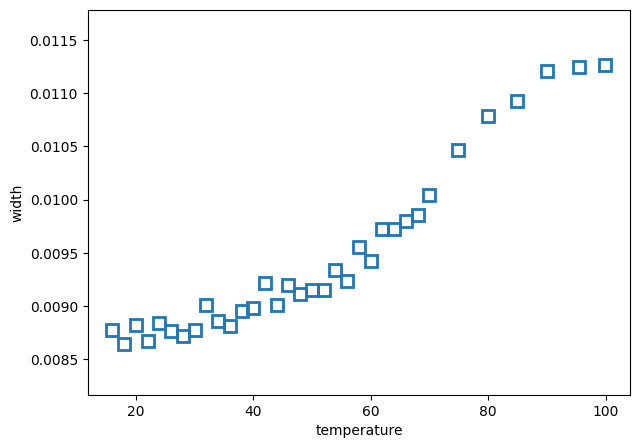

In [7]:
from arpes.config import use_tex

use_tex()
fit_results.results.F.plot_param("width")

## Introspecting fit quality

Typically, you want to see the worst fits, so that you have some idea of how to refine them.

In [8]:
worst_fit = fit_results.results.F.worst_fits()[0].item()

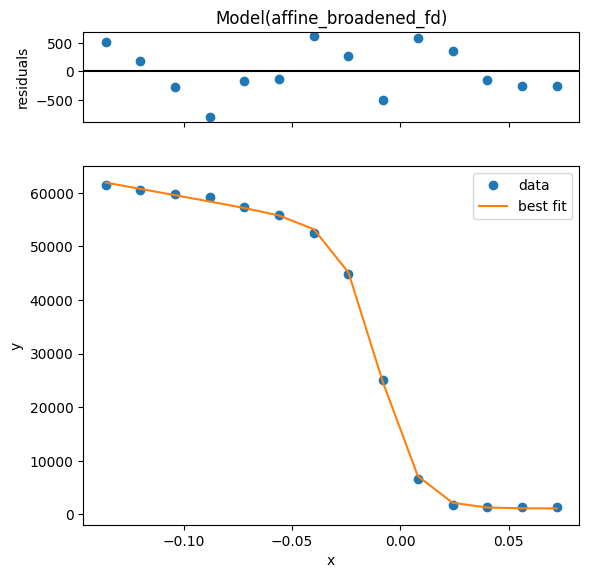

In [9]:
worst_fit_ = worst_fit.plot()

Based on this we can say that all the fits are very good. However, we may want to see how much variation there is in quality.

We can look at the `.F.mean_square_error` method for this information.

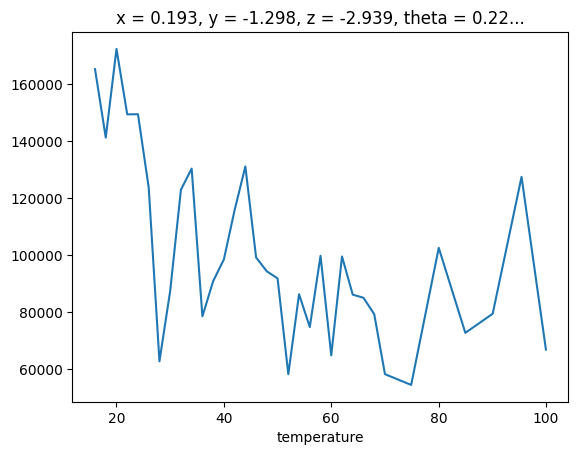

In [10]:
fit_results.results.F.mean_square_error().plot()

## Interactively inspecting fits

There's no substitute for inspecting fits by eye. PyARPES has holoviews based interactive fit inspection tools. This is very much like `profile_view` which we have already seen with the adddition that the marginal shows the curve fitting information for a broadcast fit. 

Additionally, you can use the tool to copy any given marginal's parameters to a hint dictionary which you can pass into the curve fit
for refinement.

In [11]:
from arpes.plotting import fit_inspection

# note, you can also run fit_results.F.show()
fit_inspection(fit_results)

:Layout
   .AdjointLayout.I :AdjointLayout
      :DynamicMap   []
         :Overlay
            .Image.I :Image   [temperature,eV]   (data)
            .VLine.I :VLine   [x,y]
      :DynamicMap   []
         :Overlay
            .Curve.I  :Curve   [eV]   (data)
            .Curve.II :Curve   [eV]   (y)
   .DynamicMap.I    :DynamicMap   []
      :Curve   [eV]   (residual)